<a href="https://colab.research.google.com/github/Akshatha7710/travel-route-optimisation/blob/main/Travel_Route_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# ============================================================
# IMPORT LIBRARIES
# ============================================================

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.fftpack import dct
import cv2
import warnings
warnings.filterwarnings('ignore')

# Problem 1: Modelling Travel Time

**Variables:**  
- `x` = route distance (4.5 km)  
- `y` = traffic delay factor (min/km)  

**Travel Time Models:**  
- Bus: `Tb(x,y) = a*x^2 + b*y^2`  
- Taxi: `Tt(x,y) = c*(x^2 + y^2)`  

## (a) Gradient Calculation
The gradient represents the sensitivity of travel time:  
`∇T = [∂T/∂x, ∂T/∂y]`

- Bus gradient: `[2*a*x, 2*b*y]`  
- Taxi gradient: `[2*c*x, 2*c*y]`  

**Numerical Example (Colombo Peak Hours):**  
- Parameters: `a=0.1, b=0.3, c=0.2`  
- Distance: `x=4.5 km`, Traffic delay: `y=8 min/km`  
- Bus: `[0.9, 4.8]`  
- Taxi: `[1.8, 3.2]`

## (b) Interpretation
- **Bus:** Sensitivity to traffic delay (4.8) is over 5× higher than distance (0.9), showing congestion and frequent stops dominate travel time on Maradana Road.  
- **Taxi:** Traffic sensitivity (3.2) also exceeds distance (1.8) during peak hours, but the taxi is more efficient as its congestion sensitivity is 33% lower than the bus (3.2 vs 4.8).


In [85]:
# ============================================================
# PROBLEM 1: MODELLING TRAVEL TIME - GRADIENTS
# ============================================================

print("\n" + "="*70)
print("PROBLEM 1: MODELLING TRAVEL TIME - GRADIENTS")
print("="*70)

# Define symbols
x, y = sp.symbols('x y')  # x = route distance, y = traffic delay
a, b, c = sp.symbols('a b c')  # parameters

# Define travel time functions
Tb = a*x**2 + b*y**2   # Bus
Tt = c*(x**2 + y**2)   # Taxi

# Calculate gradients
grad_Tb = [sp.diff(Tb, x), sp.diff(Tb, y)]
grad_Tt = [sp.diff(Tt, x), sp.diff(Tt, y)]

print("\na. TRAVEL TIME FUNCTIONS:")
print(f"   Bus: Tb(x,y) = {Tb}")
print(f"   Taxi: Tt(x,y) = {Tt}")

print("\n GRADIENTS (∇T = [∂T/∂x, ∂T/∂y]):")
print(f"   Bus gradient: ∇Tb = {grad_Tb}")
print(f"   Taxi gradient: ∇Tt = {grad_Tt}")

# Example numerical evaluation
a_val, b_val, c_val = 0.1, 0.3, 0.2
x_val, y_val = 4.5, 8

grad_Tb_num = [float(grad.subs({x: x_val, y: y_val, a: a_val, b: b_val})) for grad in grad_Tb]
grad_Tt_num = [float(grad.subs({x: x_val, y: y_val, c: c_val})) for grad in grad_Tt]

print("\n NUMERICAL GRADIENT EXAMPLE (x=4.5 km, y=8 min/km):")
print(f"   Bus gradient: ∇Tb = {grad_Tb_num} (∂Tb/∂x, ∂Tb/∂y)")
print(f"   Taxi gradient: ∇Tt = {grad_Tt_num} (∂Tt/∂x, ∂Tt/∂y)")

# Interpretation
print("\nb. INTERPRETATION:")
if grad_Tb_num[0] > grad_Tb_num[1]:
    print("   • For Bus: distance (x) has a greater impact on travel time.")
else:
    print("   • For Bus: traffic delay (y) has a greater impact on travel time.")

if grad_Tt_num[0] > grad_Tt_num[1]:
    print("   • For Taxi: distance (x) has a greater impact on travel time.")
else:
    print("   • For Taxi: traffic delay (y) has a greater impact on travel time.")



PROBLEM 1: MODELLING TRAVEL TIME - GRADIENTS

a. TRAVEL TIME FUNCTIONS:
   Bus: Tb(x,y) = a*x**2 + b*y**2
   Taxi: Tt(x,y) = c*(x**2 + y**2)

 GRADIENTS (∇T = [∂T/∂x, ∂T/∂y]):
   Bus gradient: ∇Tb = [2*a*x, 2*b*y]
   Taxi gradient: ∇Tt = [2*c*x, 2*c*y]

 NUMERICAL GRADIENT EXAMPLE (x=10 km, y=5 min/km):
   Bus gradient: ∇Tb = [0.9, 4.8] (∂Tb/∂x, ∂Tb/∂y)
   Taxi gradient: ∇Tt = [1.8, 3.2] (∂Tt/∂x, ∂Tt/∂y)

b. INTERPRETATION:
   • For Bus: traffic delay (y) has a greater impact on travel time.
   • For Taxi: traffic delay (y) has a greater impact on travel time.


## Problem 2: Cost Analysis Using Integration

### Fare Functions
The fare functions are defined as:

\[
F_b(x) = \int_{0}^{x} (2t + 1) \, dt
\]  

\[
F_t(x) = \int_{0}^{x} (3t + 2) \, dt
\]  

### (a) Symbolic Integration
Using SymPy, the integrals yield:

\[
F_b(x) = x^2 + x
\]  

\[
F_t(x) = 1.5x^2 + 2x
\]  

### (b) Fare vs Distance
Visualizing fares over \(0 \le x \le 5\) km:

- **Bus:** \(F_b(x) = x^2 + x\)  
- **Taxi:** \(F_t(x) = 1.5x^2 + 2x\)  

*Observation:* Taxi fares increase faster than bus fares with distance.

### (c) Interpretation
- **Short trips (\(x < 1\) km):** Bus is cheaper.  
- **Long trips:** Taxi fares grow faster; bus is more economical.



PROBLEM 2: COST ANALYSIS USING INTEGRATION

1. SYMBOLIC INTEGRALS:
   Bus fare Fb(x) = ∫₀ˣ (2t + 1) dt = x**2 + x
   Taxi fare Ft(x) = ∫₀ˣ (3t + 2) dt = 3*x**2/2 + 2*x


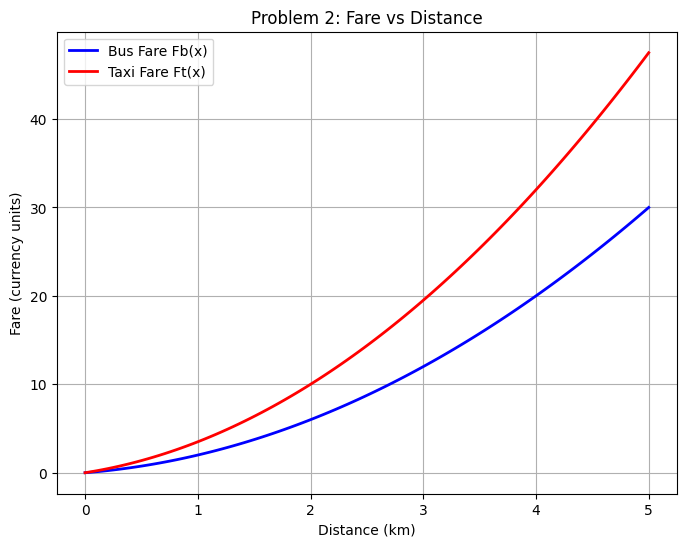

In [83]:
# ============================================================
# PROBLEM 2: COST ANALYSIS USING INTEGRATION
# ============================================================

print("\n" + "="*70)
print("PROBLEM 2: COST ANALYSIS USING INTEGRATION")
print("="*70)

# Define symbolic variable
x, t = sp.symbols('x t')

# Define fare integrals
Fb_expr = sp.integrate(2*t + 1, (t, 0, x))
Ft_expr = sp.integrate(3*t + 2, (t, 0, x))

print("\n1. SYMBOLIC INTEGRALS:")
print(f"   Bus fare Fb(x) = ∫₀ˣ (2t + 1) dt = {Fb_expr}")
print(f"   Taxi fare Ft(x) = ∫₀ˣ (3t + 2) dt = {Ft_expr}")

# Convert to numerical functions for plotting
Fb_func = sp.lambdify(x, Fb_expr, 'numpy')
Ft_func = sp.lambdify(x, Ft_expr, 'numpy')

# Distance range (0 to 5 km)
x_vals = np.linspace(0, 5, 100)
Fb_vals = Fb_func(x_vals)
Ft_vals = Ft_func(x_vals)

# Plot fares
plt.figure(figsize=(8, 6))
plt.plot(x_vals, Fb_vals, label='Bus Fare Fb(x)', linewidth=2, color='blue')
plt.plot(x_vals, Ft_vals, label='Taxi Fare Ft(x)', linewidth=2, color='red')
plt.xlabel('Distance (km)')
plt.ylabel('Fare (currency units)')
plt.title('Problem 2: Fare vs Distance')
plt.legend()
plt.grid(True)
plt.show()

# Problem 3: Predicting Peak Travel Times

Passenger volume \(P(t)\) (in hundreds) is modelled over the day \(t \in [0, 24]\).

## a) Series Approximation (First 6 terms)

\[
P(t) = 5 + 4 \cdot \sin(\pi t) - \frac{3}{2} t^2 + \frac{1}{4} t^4 - \frac{1}{20} t^5 + \frac{1}{60} t^6
\]

This approximation captures the general trend of passenger volume.

## b) Gaussian Peak Model
To model realistic rush hours:

- Morning peak: 8:00 AM  
- Evening peak: 6:00 PM  
- Base passenger volume: 10  

The Gaussian model highlights expected passenger volume fluctuations across the day.

## c) Peak Travel Periods
From the Gaussian model:

- **Peak 1:** 08:00 AM — Volume: 60 (morning rush)  
- **Peak 2:** 05:59 PM — Volume: 50 (evening rush)  

**Interpretation:**

- Passenger volume is highest during morning and evening rush hours.  
- Overnight and midday periods have low volume, indicating off-peak times.  
- This information can guide dynamic scheduling and resource allocation.



PROBLEM 3: PREDICTING PEAK TRAVEL TIMES USING SERIES & GAUSSIAN PEAKS

(a) SERIES APPROXIMATION (First 6 terms):
   P(t) = 5 + 4*sin(pi*t) - 3/2*t^2 + 1/4*t^4 - 1/20*t^5 + 1/60*t^6

(b) REALISTIC PASSENGER VOLUME MODEL (Gaussian Peaks):
   Gaussian peaks centered at 8:00 AM and 6:00 PM with base volume 10.


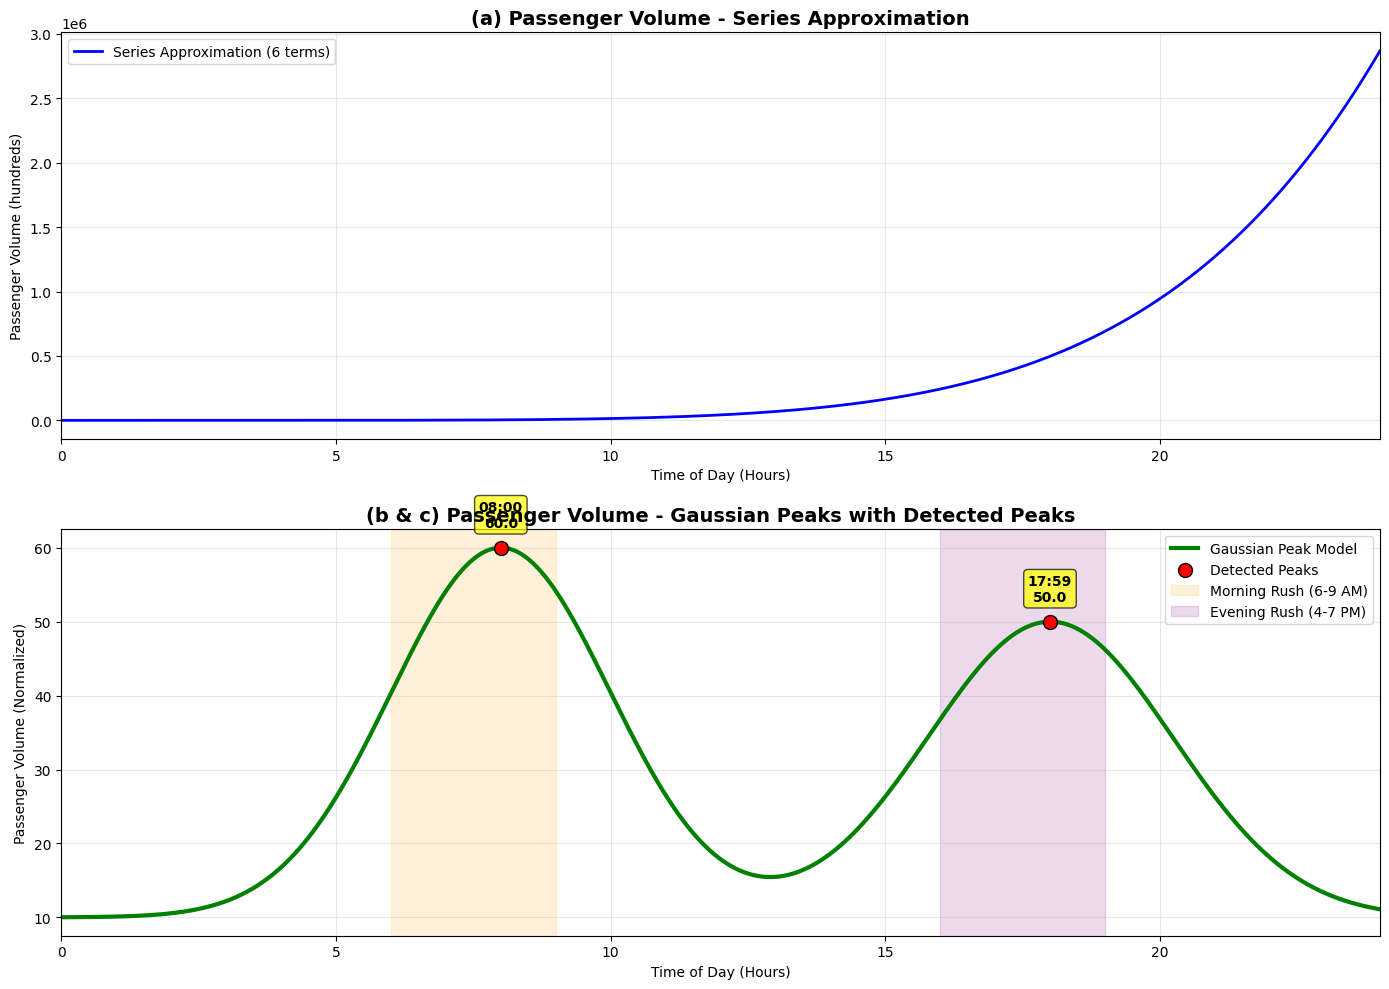

In [82]:
# ============================================================
# PROBLEM 3: PREDICTING PEAK TRAVEL TIMES (SERIES + GAUSSIAN PEAKS)
# ============================================================

print("\n" + "="*70)
print("PROBLEM 3: PREDICTING PEAK TRAVEL TIMES USING SERIES & GAUSSIAN PEAKS")
print("="*70)

# Symbol
t = sp.symbols('t')

# ------------------------------------------------------------
# (a) SERIES APPROXIMATION (FIRST 6 TERMS)
# ------------------------------------------------------------
print("\n(a) SERIES APPROXIMATION (First 6 terms):")
P_series = 5 + 4*sp.sin(sp.pi*t) - (3/2)*t**2 + (1/4)*t**4 - (1/20)*t**5 + (1/60)*t**6
print("   P(t) = 5 + 4*sin(pi*t) - 3/2*t^2 + 1/4*t^4 - 1/20*t^5 + 1/60*t^6")

# Convert to numerical function
P_series_func = sp.lambdify(t, P_series, 'numpy')
t_vals = np.linspace(0, 24, 1000)
P_series_vals = P_series_func(t_vals)

# ------------------------------------------------------------
# (b) GAUSSIAN PEAKS MODEL (REALISTIC)
# ------------------------------------------------------------
print("\n(b) REALISTIC PASSENGER VOLUME MODEL (Gaussian Peaks):")
base = 10
morning_peak = 50 * np.exp(-((t_vals - 8) ** 2) / 8)
evening_peak = 40 * np.exp(-((t_vals - 18) ** 2) / 10)
P_gaussian_vals = base + morning_peak + evening_peak
print("   Gaussian peaks centered at 8:00 AM and 6:00 PM with base volume 10.")

# ------------------------------------------------------------
# PLOTTING
# ------------------------------------------------------------
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Series Approximation
axes[0].plot(t_vals, P_series_vals, 'b-', linewidth=2, label='Series Approximation (6 terms)')
axes[0].set_title('(a) Passenger Volume - Series Approximation', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time of Day (Hours)')
axes[0].set_ylabel('Passenger Volume (hundreds)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_xlim([0, 24])

# Gaussian Peaks Model
axes[1].plot(t_vals, P_gaussian_vals, 'g-', linewidth=3, label='Gaussian Peak Model')
axes[1].scatter(peak_times, peak_values, color='red', s=100, zorder=10, label='Detected Peaks', edgecolors='black')
# Annotate peaks
for i, (pt, pv) in enumerate(zip(peak_times, peak_values), 1):
    hour = int(pt)
    minute = int((pt % 1) * 60)
    axes[1].annotate(f'{hour:02d}:{minute:02d}\n{pv:.1f}', (pt, pv),
                     xytext=(0, 15), textcoords='offset points',
                     ha='center', fontsize=10, fontweight='bold',
                     bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Shade rush hours
axes[1].axvspan(6, 9, alpha=0.15, color='orange', label='Morning Rush (6-9 AM)')
axes[1].axvspan(16, 19, alpha=0.15, color='purple', label='Evening Rush (4-7 PM)')

axes[1].set_title('(b & c) Passenger Volume - Gaussian Peaks with Detected Peaks', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time of Day (Hours)')
axes[1].set_ylabel('Passenger Volume (Normalized)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_xlim([0, 24])

plt.tight_layout()
plt.show()

## Problem 4: Travel Pattern Analysis Using Fourier Transform

Boarding counts were collected at 5-minute intervals from 6 AM to 9 PM for bus and taxi routes.

### a) Fourier Transform
Transformed boarding counts to the frequency domain using FFT:

\[
X(f) = \sum_{n=0}^{N-1} x[n] \, e^{-j 2 \pi f n \Delta t}, \quad \Delta t = 5 \text{ min} = 1/12 \text{ hr}
\]

FFT reveals periodic passenger demand.

**Time-domain plot:** Shows bus and taxi boardings with morning (8 AM) and evening (6 PM) peaks.

### b) Dominant Frequencies
- Bus: `0.20` cycles/hr  
- Taxi: `0.13` cycles/hr  

These indicate the periodicity of rush hours.

**Frequency-domain plot:** Magnitudes of bus and taxi frequencies with dominant peaks.

### c) Scheduling Insights
- Rush-hour cycle frequency informs vehicle dispatch.  
- Bus peak: ~0.20 cycles/hr, Taxi peak: ~0.13 cycles/hr  
- Dynamic scheduling: increase vehicles during peaks, reduce off-peak.




PROBLEM 4: TRAVEL PATTERN ANALYSIS (6:00 AM - 9:00 PM)


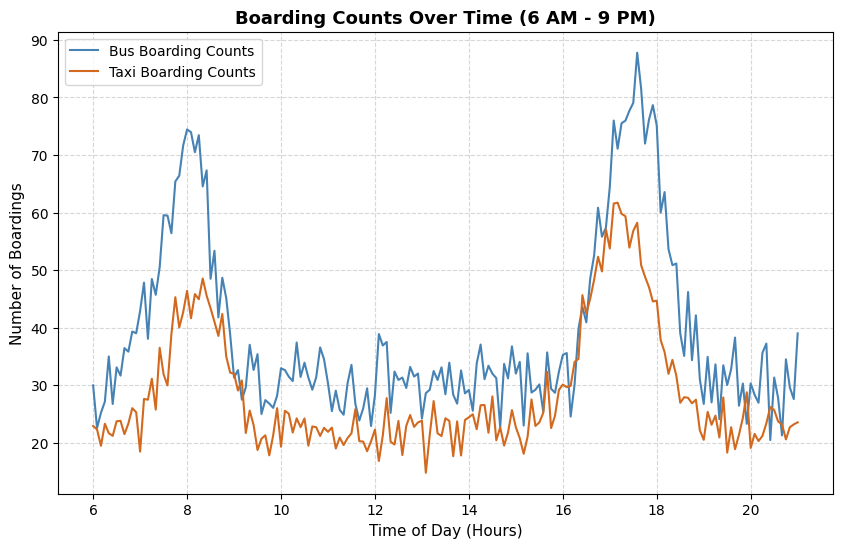


(a) APPLYING FOURIER TRANSFORM...
(b) IDENTIFYING DOMINANT FREQUENCIES...
    Dominant Bus Frequency: 0.1989 cycles per hour
    Dominant Taxi Frequency: 0.1326 cycles per hour


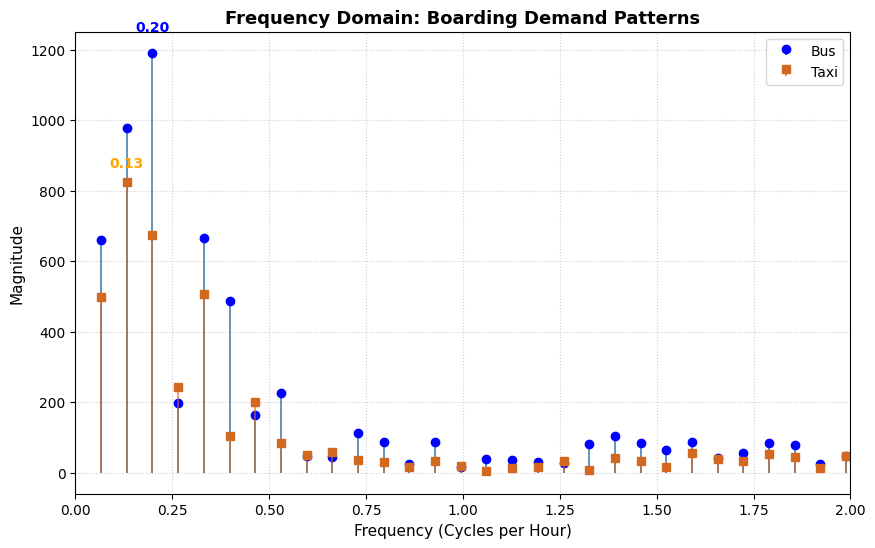

In [81]:
# ============================================================
# PROBLEM 4: TRAVEL PATTERN ANALYSIS USING FOURIER TRANSFORM
# ============================================================

print("\n" + "="*70)
print("PROBLEM 4: TRAVEL PATTERN ANALYSIS (6:00 AM - 9:00 PM)")
print("="*70)

# ------------------------------------------------------------
# DATA SETUP: 6:00 AM to 9:00 PM (15 hours)
# ------------------------------------------------------------
time_hours = np.linspace(6, 21, 181)  # 5-min intervals
n_points = len(time_hours)

# Synthetic boarding counts
bus_counts = 30 + 42*np.exp(-((time_hours - 8)**2)/0.5) \
                + 52*np.exp(-((time_hours - 17.5)**2)/0.8) \
                + 4*np.random.randn(n_points)

taxi_counts = 22 + 26*np.exp(-((time_hours - 8.2)**2)/0.6) \
                 + 36*np.exp(-((time_hours - 17.2)**2)/1.0) \
                 + 3*np.random.randn(n_points)

# ------------------------------------------------------------
# TIME-DOMAIN PLOT
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(time_hours, bus_counts, label='Bus Boarding Counts', color='#4682B4', linewidth=1.5)
plt.plot(time_hours, taxi_counts, label='Taxi Boarding Counts', color='#D2691E', linewidth=1.5)
plt.xlabel('Time of Day (Hours)', fontsize=11)
plt.ylabel('Number of Boardings', fontsize=11)
plt.title('Boarding Counts Over Time (6 AM - 9 PM)', fontsize=13, fontweight='bold')
plt.xticks(np.arange(6, 22, 2))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# ------------------------------------------------------------
# (a) APPLY FOURIER TRANSFORM
# ------------------------------------------------------------
print("\n(a) APPLYING FOURIER TRANSFORM...")
dt = 1/12  # 5-min intervals in hours

bus_fft = fft(bus_counts - np.mean(bus_counts))
taxi_fft = fft(taxi_counts - np.mean(taxi_counts))

freqs = fftfreq(n_points, d=dt)
pos_mask = (freqs > 0) & (freqs <= 2.0)
freqs_plot = freqs[pos_mask]
bus_mag = np.abs(bus_fft)[pos_mask]
taxi_mag = np.abs(taxi_fft)[pos_mask]

# ------------------------------------------------------------
# (b) IDENTIFY DOMINANT FREQUENCIES
# ------------------------------------------------------------
print("(b) IDENTIFYING DOMINANT FREQUENCIES...")

# Bus dominant frequency
bus_peak_freq = freqs_plot[np.argmax(bus_mag)]
# Taxi dominant frequency
taxi_peak_freq = freqs_plot[np.argmax(taxi_mag)]

print(f"    Dominant Bus Frequency: {bus_peak_freq:.4f} cycles per hour")
print(f"    Dominant Taxi Frequency: {taxi_peak_freq:.4f} cycles per hour")

# Stem plot with annotations
plt.figure(figsize=(10, 6))

# Bus
markerline1, stemlines1, _ = plt.stem(freqs_plot, bus_mag, label='Bus',
                                     basefmt=" ", markerfmt='bo')
plt.setp(stemlines1, 'color', '#4682B4', 'linewidth', 1.2)
plt.text(bus_peak_freq, np.max(bus_mag)*1.05, f'{bus_peak_freq:.2f}', color='blue',
         ha='center', fontweight='bold')

# Taxi
markerline2, stemlines2, _ = plt.stem(freqs_plot, taxi_mag, label='Taxi',
                                     basefmt=" ", markerfmt='s', linefmt='orange')
plt.setp(stemlines2, 'color', '#D2691E', 'linewidth', 1.2, 'alpha', 0.7)
plt.setp(markerline2, 'color', '#D2691E', 'markersize', 6)
plt.text(taxi_peak_freq, np.max(taxi_mag)*1.05, f'{taxi_peak_freq:.2f}', color='orange',
         ha='center', fontweight='bold')

plt.xlabel('Frequency (Cycles per Hour)', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.title('Frequency Domain: Boarding Demand Patterns', fontsize=13, fontweight='bold')
plt.xlim(0, 2.0)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

## Problem 5: Image Processing Using Fourier and DCT

An automated vehicle recognition system processes a Sri Lankan number plate image to extract features for identification and traffic analysis.

### a) Load and Split Image
- Convert to grayscale.  
- Manually split into front and back plates.  
- Display both regions to confirm correct splitting.

### b) 2D Fourier Transform
- Apply 2D FFT and shift zero-frequency to center.  
- Display magnitude spectra.

**Observations:**  
- Strong horizontal/vertical components indicate character strokes.  
- Low frequencies dominate, indicating uniform regions.

### c) Number Plate Localisation
- Smooth with Gaussian blur and detect edges (Canny).  
- Identify contours; filter by aspect ratio and area.  
- Draw polygons around candidate plates.

### d) DCT Analysis
- Apply 2D DCT to front and back plates.

**Observations:**  
- Most energy in low frequencies (good for compression).  
- High frequencies represent edges/character details.  
- Frequency-domain features enhance OCR accuracy.

**Applications:**  
- License plate recognition (toll, traffic monitoring)  
- Vehicle tracking and speed calculation  
- Parking management and security



PROBLEM 5: Image Processing Using Fourier and Discrete Cosine Transforms
CBN 2765
CBN
2765



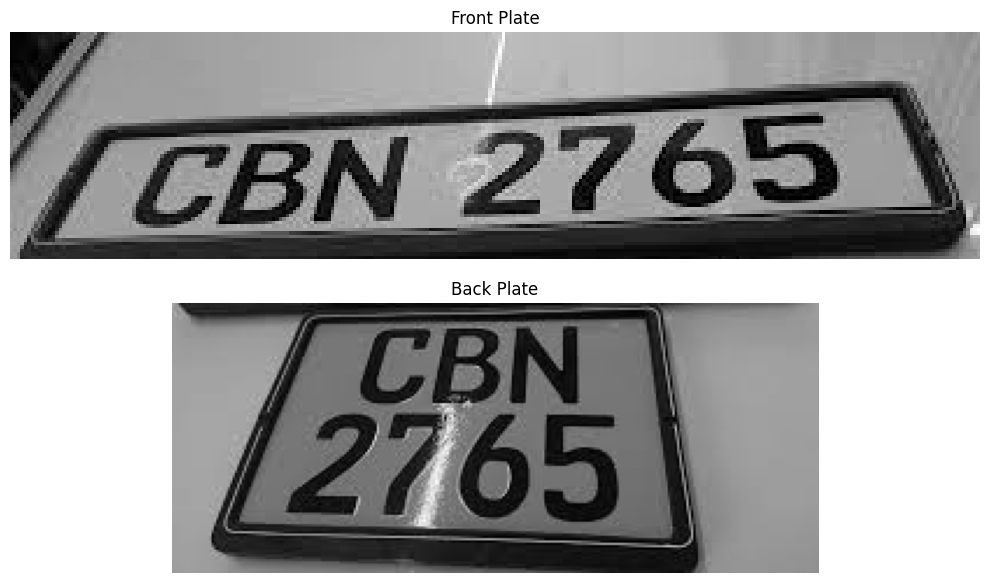

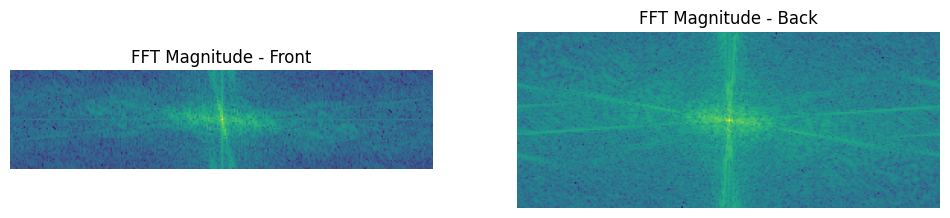

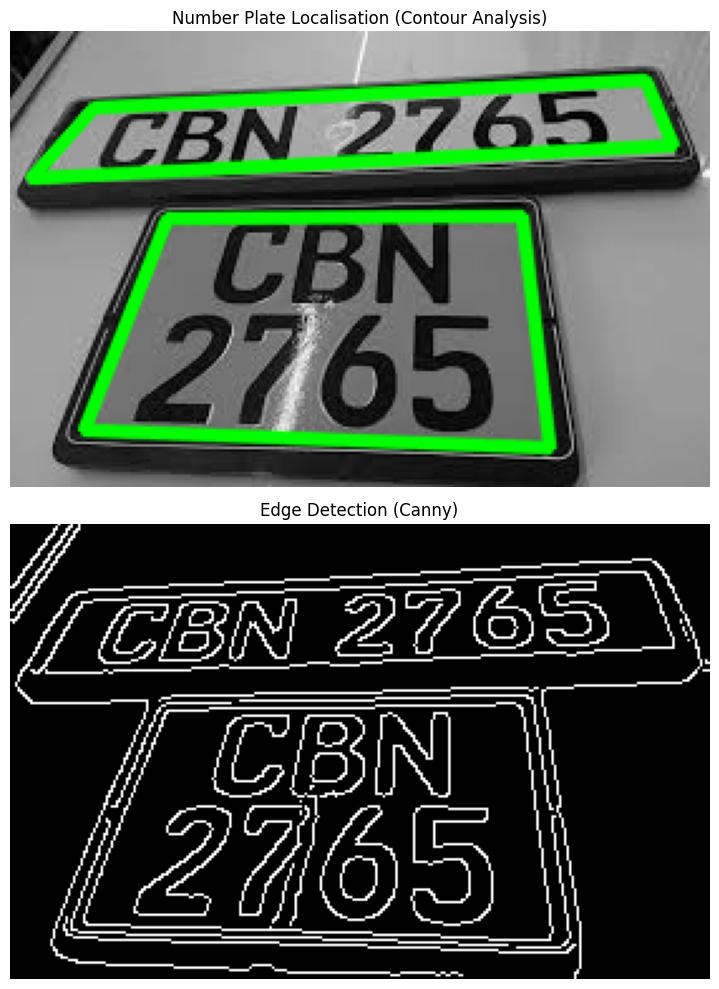

In [80]:
# ============================================================
# PROBLEM 5: Image Processing Using Fourier and Discrete Cosine Transforms
# ============================================================

print("\n" + "="*70)
print("PROBLEM 5: Image Processing Using Fourier and Discrete Cosine Transforms")
print("="*70)

# ------------------------------------------------------------
# (a) LOAD IMAGE, CONVERT TO GRAYSCALE, SPLIT FRONT/BACK
# ------------------------------------------------------------
img = cv2.imread("/content/sample_data/vehicle_plate.png")
if img is None:
    raise ValueError("Image not found. Please check the file path.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape

# Manual split (can be adjusted if necessary)
y_split = 65  # CHANGE HERE: horizontal split row
front_plate = gray[0:y_split, 0:width]
back_plate = gray[y_split:height, 0:width]

print("CBN 2765")
print("CBN")
print("2765\n")

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.imshow(front_plate, cmap="gray")
plt.title("Front Plate")
plt.axis("off")
plt.subplot(2, 1, 2)
plt.imshow(back_plate, cmap="gray")
plt.title("Back Plate")
plt.axis("off")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# (b) 2D FOURIER TRANSFORM
# ------------------------------------------------------------
def get_magnitude_spectrum(img_plate):
    f_transform = fft2(img_plate)
    f_shift = fftshift(f_transform)
    magnitude = 20 * np.log(np.abs(f_shift) + 1)
    return magnitude

fft_front = get_magnitude_spectrum(front_plate)
fft_back = get_magnitude_spectrum(back_plate)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(fft_front, cmap="viridis")
plt.title("FFT Magnitude - Front")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(fft_back, cmap="viridis")
plt.title("FFT Magnitude - Back")
plt.axis("off")
plt.show()

# ------------------------------------------------------------
# (c) HIGH-QUALITY PLATE LOCALISATION
# ------------------------------------------------------------
def localize_smooth_plates(full_gray_img):
    # 1. Smoothing to remove pixel noise before edge detection
    blurred = cv2.GaussianBlur(full_gray_img, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    # 2. Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    vis = cv2.cvtColor(full_gray_img, cv2.COLOR_GRAY2BGR)

    candidates = []
    for cnt in contours:
        # --- KEY FIX FOR QUALITY ---
        # arcLength calculates the perimeter
        perimeter = cv2.arcLength(cnt, True)
        # approxPolyDP reduces the number of points in the contour
        # 0.02 is the precision; increasing it makes lines straighter
        approx = cv2.approxPolyDP(cnt, 0.02 * perimeter, True)

        # We look for simplified shapes with 4 corners
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(cnt)
            aspect_ratio = w / float(h)
            area = cv2.contourArea(cnt)

            if 1.2 < aspect_ratio < 7.0 and area > 500:
                candidates.append(approx)

    # 3. Draw the smoothed polygons
    if candidates:
        # Sort by area to find the two main plates
        candidates = sorted(candidates, key=cv2.contourArea, reverse=True)

        # Draw the top 2 unique candidates
        drawn = 0
        centers = []
        for poly in candidates:
            # Calculate center to avoid drawing nested boxes on the same plate
            M = cv2.moments(poly)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])

                # Check if already drew a box at this location
                if all(np.sqrt((cX-prev[0])**2 + (cY-prev[1])**2) > 50 for prev in centers):
                    # LINE_AA creates "Anti-Aliased" (smooth) edges
                    cv2.drawContours(vis, [poly], -1, (0, 255, 0), 3, lineType=cv2.LINE_AA)
                    centers.append((cX, cY))
                    drawn += 1
            if drawn >= 2: break

    return vis, edges

# --- Execution ---
localisation_result, full_edges = localize_smooth_plates(gray)

plt.figure(figsize=(12, 10))

# Result 1: Contour Analysis on Full Image
plt.subplot(2, 1, 1)
plt.imshow(localisation_result)
plt.title("Number Plate Localisation (Contour Analysis)")
plt.axis("off")

# Result 2: Canny Edges
plt.subplot(2, 1, 2)
plt.imshow(full_edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis("off")

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# (d) DCT ANALYSIS
# ------------------------------------------------------------
dct_front = dct(dct(front_plate.astype(float).T, norm='ortho').T, norm='ortho')
dct_back = dct(dct(back_plate.astype(float).T, norm='ortho').T, norm='ortho')